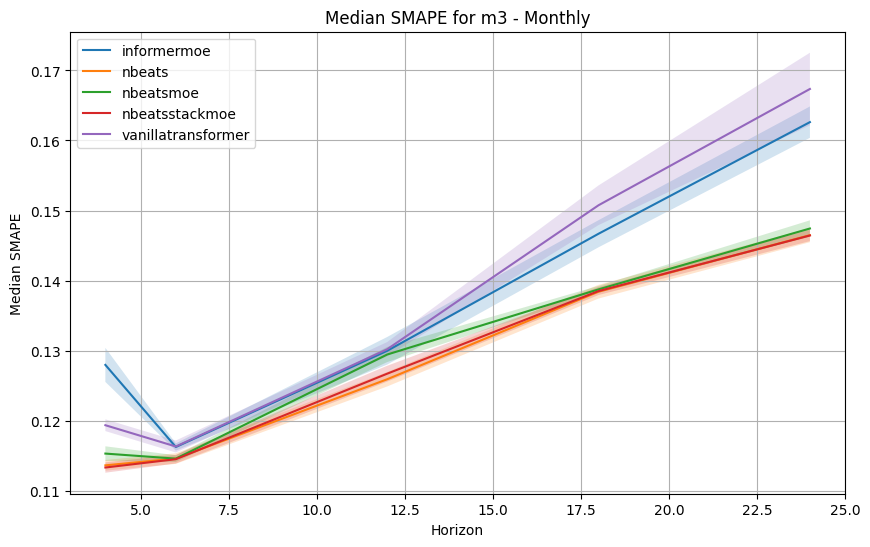

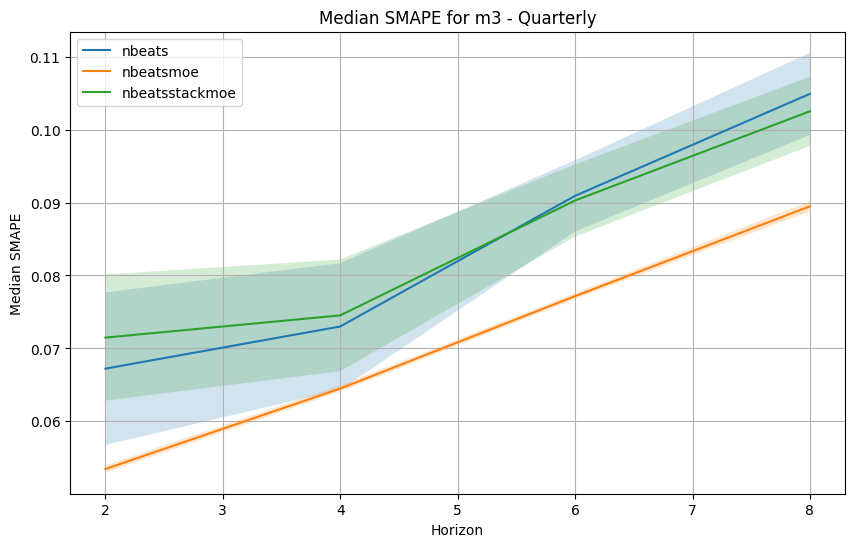

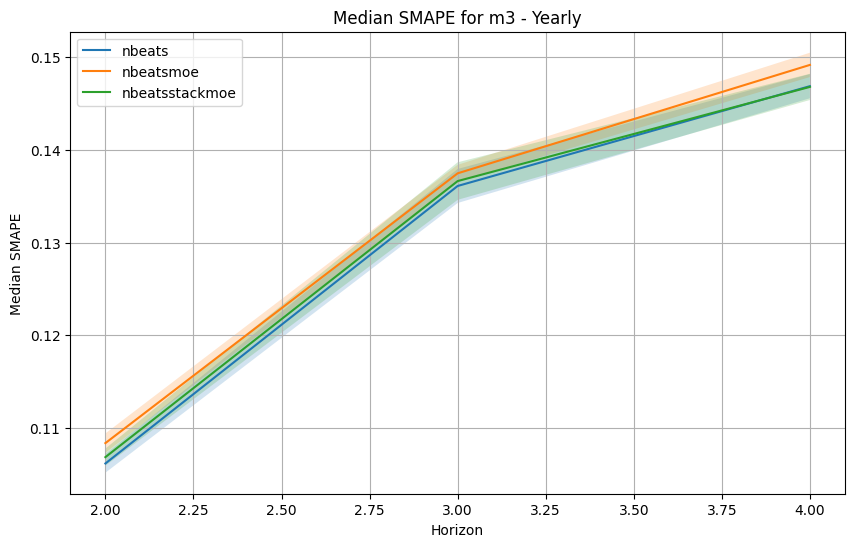

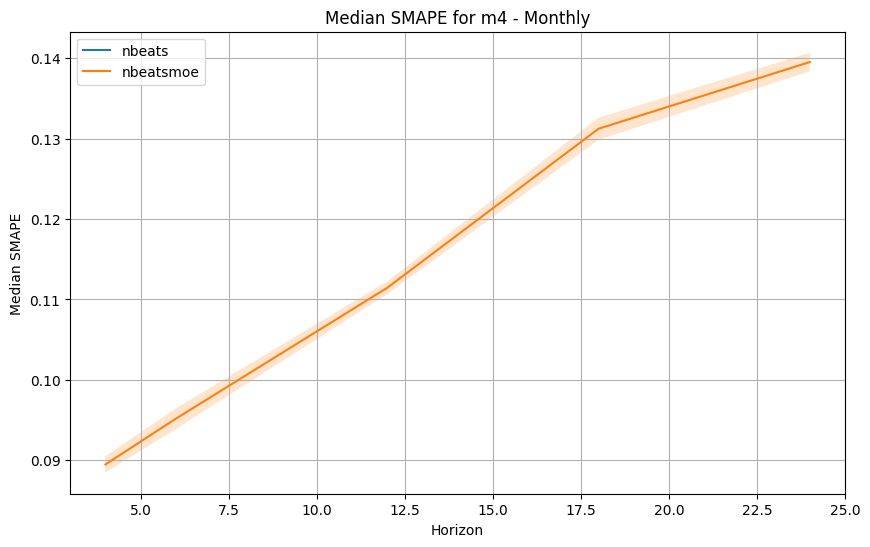

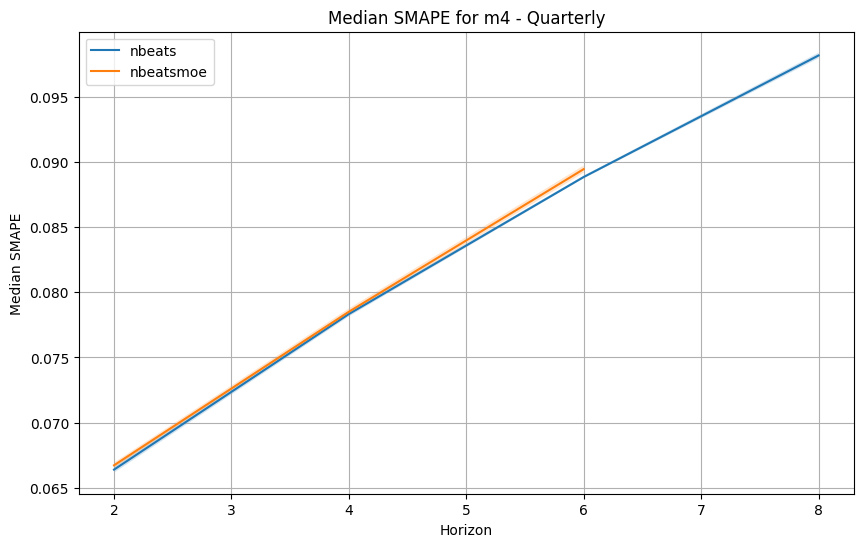

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:\\Users\\ricar\\mixture_of_experts_time_series\\results_summary.csv")

# Group by dataset and group first
for (dataset, group_name), subset in data.groupby(["dataset", "group"]):
    
    plt.figure(figsize=(10, 6))  # Create a new figure for each dataset-group
    
    # Group within this subset by model
    for model_name, model_data in subset.groupby("model_name"):
        horizons = model_data["horizon"]
        median_smape = model_data["median_smape"]
        std_dev_smape = model_data["std_dev_smape"]

        # Plot median SMAPE
        plt.plot(horizons, median_smape, label=model_name)

        # Plot standard deviation as shaded area
        plt.fill_between(
            horizons,
            median_smape - std_dev_smape,
            median_smape + std_dev_smape,
            alpha=0.2
        )

    # Titles and labels
    plt.title(f"Median SMAPE for {dataset} - {group_name}")
    plt.xlabel("Horizon")
    plt.ylabel("Median SMAPE")
    plt.legend()
    plt.grid()
    
    # Show or save the plot
    plt.show()  # You can replace this with plt.savefig(f"{dataset}_{group_name}.png") to save